creating dataset with 75% missing value

In [1]:
import pandas as pd
import numpy as np

In [59]:
df= pd.DataFrame(
    {
    'Gender': np.random.binomial(1,0.6,100), # generally binary varibles follow binomial distribution perhaps
    'Height': np.random.normal(0,10,100),
    'Noise' : np.random.normal(0,2,100)
    }
)

In [60]:
df.head(n=100)

,Gender,Height,Noise
0,1,7.777035,2.504196
1,1,4.360684,-1.269580
2,1,-4.045084,-3.219324
3,1,7.630678,-0.425364
4,1,1.608303,0.608077
...,...,...,...
95,0,7.028269,-0.175549
96,0,-17.213198,0.551485
97,1,13.276998,-3.371567
98,1,7.788817,-1.881404


In [64]:
# Don't print. it's just practice
df['Height'] = df['Height'] + df['Gender']


In [61]:
df['Height'] = df['Height'] + df['Gender'].apply(lambda g: 150 if g else 180)
print(df['Height'])

0     157.777035
1     154.360684
2     145.954916
3     157.630678
4     151.608303
         ...    
95    187.028269
96    162.786802
97    163.276998
98    157.788817
99    160.873138
Name: Height, Length: 100, dtype: float64


Compare mse from the cell with below with other ridge regressors

In [62]:
df['Weight']=df['Height']+df['Noise']-110
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
reg = Ridge()
x,y=df[['Height']],df['Weight']
reg.fit(x,y)
df['RidgeRegression']=reg.predict(x)
mean_squared_error(y, reg.predict(x))


3.4536874865277145

replace height with 75% missing value

In [63]:
df['Height (with 75% NaN)']=df['Height'].apply(lambda x: x if np.random.binomial(1,0.25,1)[0] else np.NaN)
df['Weight']=df['Height']+df['Noise']-110
df.head(n=10)

,Gender,Height,Noise,Weight,RidgeRegression,Height (with 75% NaN)
0,1,157.777035,2.504196,50.281231,47.518990,NaN
1,1,154.360684,-1.269580,43.091104,44.063793,NaN
2,1,145.954916,-3.219324,32.735592,35.562447,NaN
3,1,157.630678,-0.425364,47.205315,47.370969,NaN
4,1,151.608303,0.608077,42.216380,41.280116,NaN
5,0,200.807553,-2.571130,88.236422,91.038785,NaN
6,1,141.232528,0.876399,32.108928,30.786364,NaN
7,0,199.323007,-1.779683,87.543324,89.537359,NaN
8,0,186.406212,0.014598,76.420810,76.473694,NaN
9,1,164.619091,1.672117,56.291208,54.438843,164.619091


In [64]:
df.isnull().mean()

Gender                   0.00
Height                   0.00
Noise                    0.00
Weight                   0.00
RidgeRegression          0.00
Height (with 75% NaN)    0.76
dtype: float64

Dealing with missing value

1) missing value = 0 

In [65]:
df['Height (with 75% zero impuded)'] = df['Height (with 75% NaN)'].fillna(0)

In [66]:
df.head(n=10)

,Gender,Height,Noise,Weight,RidgeRegression,Height (with 75% NaN),Height (with 75% zero impuded)
0,1,157.777035,2.504196,50.281231,47.518990,NaN,0.000000
1,1,154.360684,-1.269580,43.091104,44.063793,NaN,0.000000
2,1,145.954916,-3.219324,32.735592,35.562447,NaN,0.000000
3,1,157.630678,-0.425364,47.205315,47.370969,NaN,0.000000
4,1,151.608303,0.608077,42.216380,41.280116,NaN,0.000000
5,0,200.807553,-2.571130,88.236422,91.038785,NaN,0.000000
6,1,141.232528,0.876399,32.108928,30.786364,NaN,0.000000
7,0,199.323007,-1.779683,87.543324,89.537359,NaN,0.000000
8,0,186.406212,0.014598,76.420810,76.473694,NaN,0.000000
9,1,164.619091,1.672117,56.291208,54.438843,164.619091,164.619091


this mse value is much much larger than the mse we calculated from our known values(below cell)

In [67]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
reg=Ridge()
x,y=df[['Height (with 75% zero impuded)']],df['Weight']
reg.fit(x,y)
df['RidgeRegressionWithZeroImpuded']=reg.predict(x)
mean_squared_error(y, reg.predict(x))

378.5900918282416

In [68]:
df.head(n=10)

,Gender,Height,Noise,Weight,RidgeRegression,Height (with 75% NaN),Height (with 75% zero impuded),RidgeRegressionWithZeroImpuded
0,1,157.777035,2.504196,50.281231,47.518990,NaN,0.000000,53.494822
1,1,154.360684,-1.269580,43.091104,44.063793,NaN,0.000000,53.494822
2,1,145.954916,-3.219324,32.735592,35.562447,NaN,0.000000,53.494822
3,1,157.630678,-0.425364,47.205315,47.370969,NaN,0.000000,53.494822
4,1,151.608303,0.608077,42.216380,41.280116,NaN,0.000000,53.494822
5,0,200.807553,-2.571130,88.236422,91.038785,NaN,0.000000,53.494822
6,1,141.232528,0.876399,32.108928,30.786364,NaN,0.000000,53.494822
7,0,199.323007,-1.779683,87.543324,89.537359,NaN,0.000000,53.494822
8,0,186.406212,0.014598,76.420810,76.473694,NaN,0.000000,53.494822
9,1,164.619091,1.672117,56.291208,54.438843,164.619091,164.619091,48.169486


graph

<AxesSubplot:title={'center':'RidgeRegressionWithZeroImpuded'}, xlabel='Height (with 75% zero impuded)', ylabel='RidgeRegressionWithZeroImpuded'>

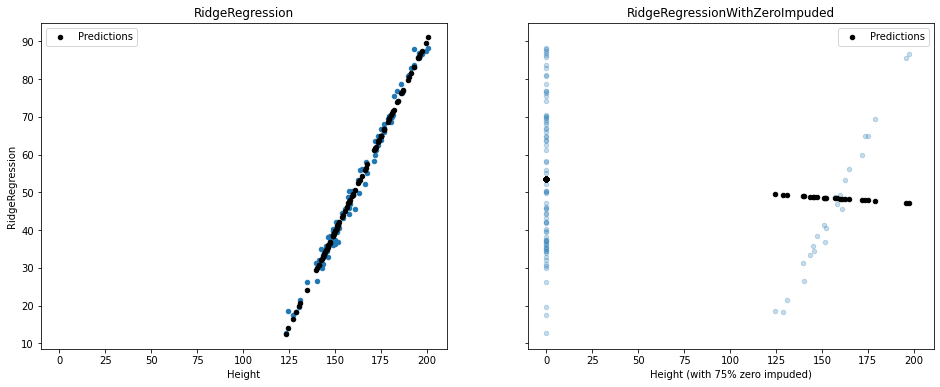

In [69]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)
# We plot the data 3 times
df.sort_values('Height').plot(
title='Data', kind='scatter', x='Height', y='Weight', ax=axs[0]
)
df.sort_values('Height (with 75% zero impuded)').plot(
kind='scatter', x='Height (with 75% zero impuded)', y='Weight', ax=axs[1], marker='o', alpha=0.25
)
# Here we plot the Ridge Regression predictions
df.sort_values('Height').plot(
title='RidgeRegression', kind='scatter', x='Height', y='RidgeRegression',
ax=axs[0], marker='o', color='k', label='Predictions'
)
# Here we plot the Ridge Regression with 75% zero impuded predictions
df.sort_values('Height (with 75% zero impuded)').plot(
title='RidgeRegressionWithZeroImpuded', kind='scatter', x='Height (with 75% zero impuded)', y='RidgeRegressionWithZeroImpuded',
ax=axs[1], marker='o', color='k', label='Predictions'
)

2) missing value = mean

In [70]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
#df['Height (with 75% imputed mean)']=imp.fit_transform(df[['Height (with 75% NaN)']])[:,0]
df['Height (with 75% imputed mean)']=imp.fit_transform(df[['Height (with 75% NaN)']])[:,0]

In [71]:
df.head(n=10)

,Gender,Height,Noise,Weight,RidgeRegression,Height (with 75% NaN),Height (with 75% zero impuded),RidgeRegressionWithZeroImpuded,Height (with 75% imputed mean)
0,1,157.777035,2.504196,50.281231,47.518990,NaN,0.000000,53.494822,156.515729
1,1,154.360684,-1.269580,43.091104,44.063793,NaN,0.000000,53.494822,156.515729
2,1,145.954916,-3.219324,32.735592,35.562447,NaN,0.000000,53.494822,156.515729
3,1,157.630678,-0.425364,47.205315,47.370969,NaN,0.000000,53.494822,156.515729
4,1,151.608303,0.608077,42.216380,41.280116,NaN,0.000000,53.494822,156.515729
5,0,200.807553,-2.571130,88.236422,91.038785,NaN,0.000000,53.494822,156.515729
6,1,141.232528,0.876399,32.108928,30.786364,NaN,0.000000,53.494822,156.515729
7,0,199.323007,-1.779683,87.543324,89.537359,NaN,0.000000,53.494822,156.515729
8,0,186.406212,0.014598,76.420810,76.473694,NaN,0.000000,53.494822,156.515729
9,1,164.619091,1.672117,56.291208,54.438843,164.619091,164.619091,48.169486,164.619091


In [72]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
reg=Ridge()
x,y=df[['Height (with 75% imputed mean)']],df['Weight']
reg.fit(x,y)
df['RidgeRegressionWithMeanImpuded']=reg.predict(x)
mean_squared_error(y,df['RidgeRegressionWithMeanImpuded'])

302.76818660753764

In [73]:
df.head(n=10)

,Gender,Height,Noise,Weight,RidgeRegression,Height (with 75% NaN),Height (with 75% zero impuded),RidgeRegressionWithZeroImpuded,Height (with 75% imputed mean),RidgeRegressionWithMeanImpuded
0,1,157.777035,2.504196,50.281231,47.518990,NaN,0.000000,53.494822,156.515729,52.279655
1,1,154.360684,-1.269580,43.091104,44.063793,NaN,0.000000,53.494822,156.515729,52.279655
2,1,145.954916,-3.219324,32.735592,35.562447,NaN,0.000000,53.494822,156.515729,52.279655
3,1,157.630678,-0.425364,47.205315,47.370969,NaN,0.000000,53.494822,156.515729,52.279655
4,1,151.608303,0.608077,42.216380,41.280116,NaN,0.000000,53.494822,156.515729,52.279655
5,0,200.807553,-2.571130,88.236422,91.038785,NaN,0.000000,53.494822,156.515729,52.279655
6,1,141.232528,0.876399,32.108928,30.786364,NaN,0.000000,53.494822,156.515729,52.279655
7,0,199.323007,-1.779683,87.543324,89.537359,NaN,0.000000,53.494822,156.515729,52.279655
8,0,186.406212,0.014598,76.420810,76.473694,NaN,0.000000,53.494822,156.515729,52.279655
9,1,164.619091,1.672117,56.291208,54.438843,164.619091,164.619091,48.169486,164.619091,60.289646


<AxesSubplot:title={'center':'RidgeRegressionWithMeanImpuded'}, xlabel='Height (with 75% imputed mean)', ylabel='RidgeRegressionWithMeanImpuded'>

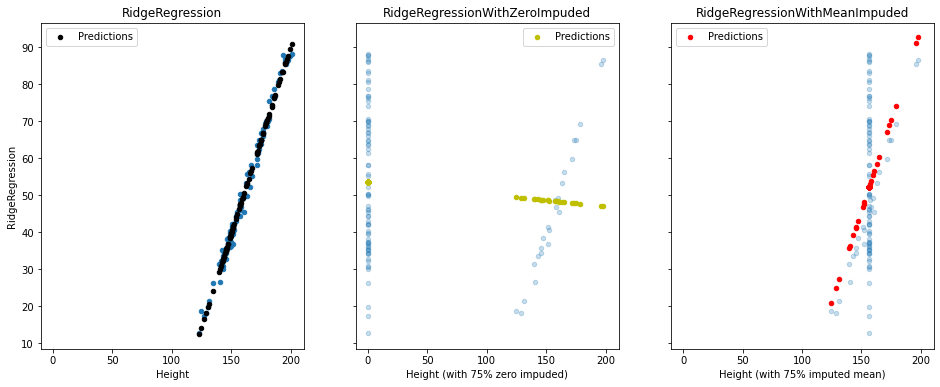

In [74]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharex=True, sharey=True)
# We plot the data 3 times
df.sort_values('Height').plot(
title='Data', kind='scatter', x='Height', y='Weight', ax=axs[0]
)
df.sort_values('Height (with 75% zero impuded)').plot(
kind='scatter', x='Height (with 75% zero impuded)', y='Weight', ax=axs[1], marker='o', alpha=0.25
)
df.sort_values('Height (with 75% imputed mean)').plot(
kind='scatter', x='Height (with 75% imputed mean)', y='Weight', ax=axs[2], marker='o', alpha=0.25
)
# Here we plot the Ridge Regression predictions
df.sort_values('Height').plot(
title='RidgeRegression', kind='scatter', 
x='Height', y='RidgeRegression',
ax=axs[0], marker='o', color='k', label='Predictions'
)
# Here we plot the Ridge Regression with 75% zero impuded predictions
df.sort_values('Height (with 75% zero impuded)').plot(
title='RidgeRegressionWithZeroImpuded', kind='scatter', 
x='Height (with 75% zero impuded)', y='RidgeRegressionWithZeroImpuded',
ax=axs[1], marker='o', color='y', label='Predictions'
)
# Here we plot the Ridge Regression with 75% mean impuded predictions
df.sort_values('Height (with 75% imputed mean)').plot(
title='RidgeRegressionWithMeanImpuded', kind='scatter', 
x='Height (with 75% imputed mean)', y='RidgeRegressionWithMeanImpuded',
ax=axs[2], marker='o', color='r', label='Predictions'
)

3) missing value = using neighbour feature

In [79]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(missing_values=np.nan)
df['Height (with 75% iterative imputed)']=imp.fit_transform(df[['Height (with 75% NaN)','Gender']])

In [80]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
reg=Ridge()
x,y=df[['Height (with 75% iterative imputed)']],df['Weight']
reg.fit(x,y)
df['RidgeRegressionWithIterativeImpute']=reg.predict(x)
mean_squared_error(y,df['RidgeRegressionWithIterativeImpute'])

76.93715218154718

<AxesSubplot:title={'center':'RidgeRegressionWithMeanImpuded'}, xlabel='Height (with 75% iterative imputed)', ylabel='RidgeRegressionWithIterativeImpute'>

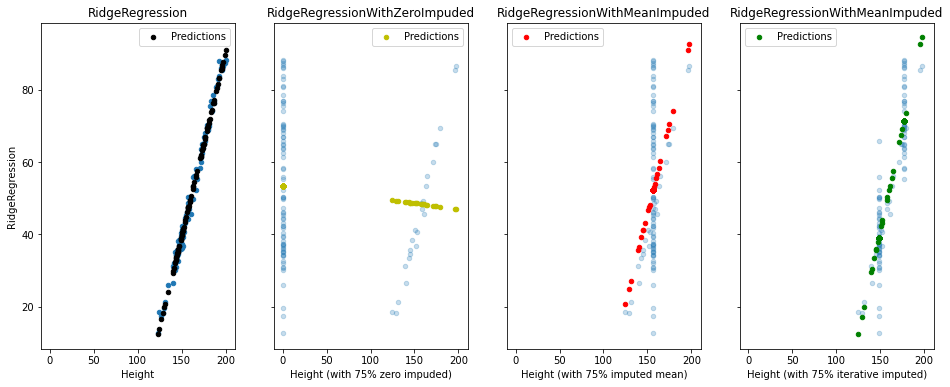

In [81]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 4, figsize=(16, 6), sharex=True, sharey=True)
# We plot the data 3 times
df.sort_values('Height').plot(
title='Data', kind='scatter', x='Height', y='Weight', ax=axs[0]
)
df.sort_values('Height (with 75% zero impuded)').plot(
kind='scatter', x='Height (with 75% zero impuded)', y='Weight', ax=axs[1], marker='o', alpha=0.25
)
df.sort_values('Height (with 75% imputed mean)').plot(
kind='scatter', x='Height (with 75% imputed mean)', y='Weight', ax=axs[2], marker='o', alpha=0.25
)
df.sort_values('Height (with 75% iterative imputed)').plot(
kind='scatter', x='Height (with 75% iterative imputed)', y='Weight', ax=axs[3], marker='o', alpha=0.25
)
# Here we plot the Ridge Regression predictions
df.sort_values('Height').plot(
title='RidgeRegression', kind='scatter', 
x='Height', y='RidgeRegression',
ax=axs[0], marker='o', color='k', label='Predictions'
)
# Here we plot the Ridge Regression with 75% zero impuded predictions
df.sort_values('Height (with 75% zero impuded)').plot(
title='RidgeRegressionWithZeroImpuded', kind='scatter', 
x='Height (with 75% zero impuded)', y='RidgeRegressionWithZeroImpuded',
ax=axs[1], marker='o', color='y', label='Predictions'
)
# Here we plot the Ridge Regression with 75% mean impuded predictions
df.sort_values('Height (with 75% imputed mean)').plot(
title='RidgeRegressionWithMeanImpuded', kind='scatter', 
x='Height (with 75% imputed mean)', y='RidgeRegressionWithMeanImpuded',
ax=axs[2], marker='o', color='r', label='Predictions'
)
# Here we plot the Ridge Regression with 75% mean impuded predictions
df.sort_values('Height (with 75% iterative imputed)').plot(
title='RidgeRegressionWithMeanImpuded', kind='scatter', 
x='Height (with 75% iterative imputed)', y='RidgeRegressionWithIterativeImpute',
ax=axs[3], marker='o', color='g', label='Predictions'
)

iterative impute-->winner winner, chicken dinner

Non-numerical data encoding

non-numerical dataset creation

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.DataFrame({
    'Size':np.random.choice(['XS', 'S', 'M', 'L', 'XL', 'XXL'], 10),
    'Brand': np.random.choice(['Nike', 'Puma', 'Adidas', 'Le Coq','Reebok'], 10)
})

In [4]:
df.head(n=10)

,Size,Brand
0,S,Adidas
1,M,Le Coq
2,S,Adidas
3,XL,Nike
4,M,Le Coq
5,M,Le Coq
6,XXL,Nike
7,S,Reebok
8,XS,Adidas
9,S,Le Coq


In [5]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.5)

1) one hot encoding

In [10]:
from category_encoders.one_hot import OneHotEncoder
encoder=OneHotEncoder(use_cat_names=True, handle_unknown='return_nan')
x_train=encoder.fit_transform(df_train)
x_test=encoder.transform(df_test)

/home/mahmud/anaconda3/envs/computer-vision/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [13]:
df.head(n=10)

,Size,Brand
0,S,Adidas
1,M,Le Coq
2,S,Adidas
3,XL,Nike
4,M,Le Coq
5,M,Le Coq
6,XXL,Nike
7,S,Reebok
8,XS,Adidas
9,S,Le Coq


In [12]:
print(x_train)

   Size_XS  Size_XXL  Size_S  Size_M  Brand_Adidas  Brand_Nike  Brand_Le Coq
8      1.0       0.0     0.0     0.0           1.0         0.0           0.0
6      0.0       1.0     0.0     0.0           0.0         1.0           0.0
9      0.0       0.0     1.0     0.0           0.0         0.0           1.0
1      0.0       0.0     0.0     1.0           0.0         0.0           1.0
2      0.0       0.0     1.0     0.0           1.0         0.0           0.0


In [11]:
print(x_test)

   Size_XS  Size_XXL  Size_S  Size_M  Brand_Adidas  Brand_Nike  Brand_Le Coq
7      0.0       0.0     1.0     0.0           NaN         NaN           NaN
4      0.0       0.0     0.0     1.0           0.0         0.0           1.0
0      0.0       0.0     1.0     0.0           1.0         0.0           0.0
3      NaN       NaN     NaN     NaN           0.0         1.0           0.0
5      0.0       0.0     0.0     1.0           0.0         0.0           1.0
